In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load dataset
df = pd.read_csv('pizza_sales.csv')

# Check structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Row Labels          5 non-null      object 
 1   Sum of total_price  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 212.0+ bytes


,Row Labels,Sum of total_price
0,Chicken,195919.50
1,Classic,220053.10
2,Supreme,208197.00
3,Veggie,193690.45
4,Grand Total,817860.05


In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


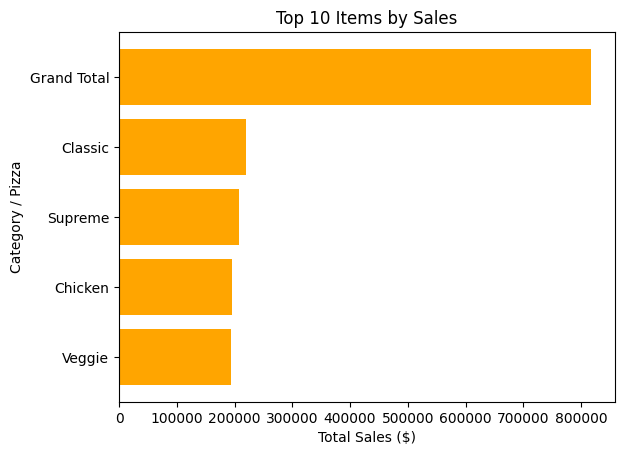

count         5.000000
mean     327144.020000
std      274521.770907
min      193690.450000
25%      195919.500000
50%      208197.000000
75%      220053.100000
max      817860.050000
Name: sum_of_total_price, dtype: float64


In [11]:
# Top 10 categories/pizzas by total sales
top_items = df.sort_values(by='sum_of_total_price', ascending=False).head(10)
plt.barh(top_items['row_labels'], top_items['sum_of_total_price'], color='orange')
plt.xlabel('Total Sales ($)')
plt.ylabel('Category / Pizza')
plt.title('Top 10 Items by Sales')
plt.gca().invert_yaxis()
plt.show()

# Summary stats
print(df['sum_of_total_price'].describe())


In [12]:
# Encode text labels to numbers
le = LabelEncoder()
df['row_labels_encoded'] = le.fit_transform(df['row_labels'])

# Features (X) and Target (y)
X = df[['row_labels_encoded']]
y = df['sum_of_total_price']

# Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: nan
RMSE: 155317.62857142856


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


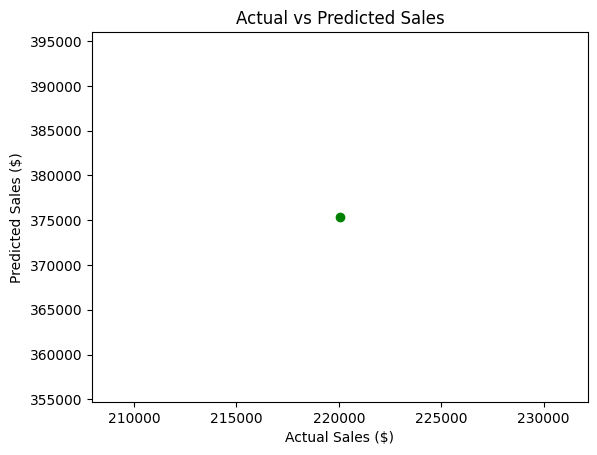

In [14]:
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Sales ($)")
plt.ylabel("Predicted Sales ($)")
plt.title("Actual vs Predicted Sales")
plt.show()
